<a href="https://colab.research.google.com/github/Habtamuyihun561/MAIA/blob/main/Copy_of_ml_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chalenge 1
Dataset loading,
Dataset analysis,
data set preparation,
model creation ,
model training ,
modle evaluation


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
data,target=iris.data,iris.target
#print(data) #features
#print(target) #label
print(len(data))#check length of the data
data.shape #shape of the data
target.shape
print("Data:".format())

In [ ]:
# Data set analysis using panda
import pandas as pd
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df)
iris_df.describe()
iris_df.info()


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# data preparation
# Data is divide into trainign and testing data
from sklearn.model_selection import train_test_split
data_train, data_test, target_train,target_test=train_test_split(data,target,test_size=0.2, random_state=41)
print(len(data_train))
print(len(data_test))
print(len(target_train))
print(len(target_test))

In [ ]:
# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model= KNeighborsClassifier(n_neighbors=3)
# Training
model.fit(data_train, target_train)

#Testing

predictions=model.predict(data_test)
print(predictions)
#Model Evaluation
accuracy=accuracy_score(target_test,predictions)
print(accuracy)
confusion_matrix(target_test, predictions)



Challenge 2, Breat cancer data set

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
data=dataset.data
target=dataset.target
#print(ldata)
#print(target)
print(len(data))
print(len(target))
#target=data.target[[10, 50, 85]]
x_train,x_test, y_train,y_test= train_test_split(data,target, test_size=0.2, random_state=42)

print(len(x_train))
print(len(x_test))
print(len(y_train))


In [ ]:
# Model Creation
from sklearn import svm
model= KNeighborsClassifier(n_neighbors=3)

#Testing
predictions=model.predict(x_test)
print(predictions)
# Model evaluation
accuracy=accuracy_score(y_test,predictions)
print(accuracy)
confusion_matrix(y_test, predictions)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Training
model.fit(x_train, y_train)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


#Machine Learning Lab 2: Feature Extraction and Cross Validation
#Challenge 1

In [ ]:
# feature extraction
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Step 2: Exploratory Data Analysis
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
#print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

In [ ]:
# Step 3: Feature Selection
# For demonstration, let's use SelectKBest with chi2 to select top 100 features
#k_best = SelectKBest(score_func=chi2, k=100)
#X_selected = k_best.fit_transform(X, y)

# Print indices of selected features
#selected_feature_indices = np.where(k_best.get_support())[0]
#print("Indices of selected features:", selected_feature_indices)

In [ ]:
# Step 3: Feature Selection
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Technique 1: SelectKBest with chi2
k_best = SelectKBest(score_func=chi2, k=2)
X_train_kbest = k_best.fit_transform(X_train, y_train)
selected_features_kbest = np.array(iris.feature_names)[k_best.get_support()]
#print("number of samples",selected_features_kbest.shape)


# Feature Selection Technique 2: Recursive Feature Elimination (RFE) with Random Forest
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=2, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = np.array(iris.feature_names)[rfe.get_support()]

number of samples 2
number of samples (2,)


In [ ]:
# Step 4: Train a classifier using the selected features
# Train classifiers using selected features
rf_classifier_all_features = RandomForestClassifier()
rf_classifier_selected_features_kbest = RandomForestClassifier()
rf_classifier_selected_features_rfe = RandomForestClassifier()

# Train with all features
rf_classifier_all_features.fit(X_train, y_train)

# Train with selected features using SelectKBest
rf_classifier_selected_features_kbest.fit(X_train_kbest, y_train)

# Train with selected features using RFE
rf_classifier_selected_features_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier()

In [ ]:
# Step 5: Evaluate the performance of the model
# Test on the testing set
y_pred_all_features = rf_classifier_all_features.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)

# Transform test set using selected features
X_test_kbest = k_best.transform(X_test)
X_test_rfe = rfe.transform(X_test)

# Predictions using models with selected features
y_pred_kbest = rf_classifier_selected_features_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = rf_classifier_selected_features_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

In [ ]:
# Step 6: Compare the performance
print("Accuracy with all features:", accuracy_all_features)
print("Selected features using SelectKBest:", selected_features_kbest)
print("Accuracy with selected features using SelectKBest:", accuracy_kbest)
print("Selected features using RFE:", selected_features_rfe)
print("Accuracy with selected features using RFE:", accuracy_rfe)

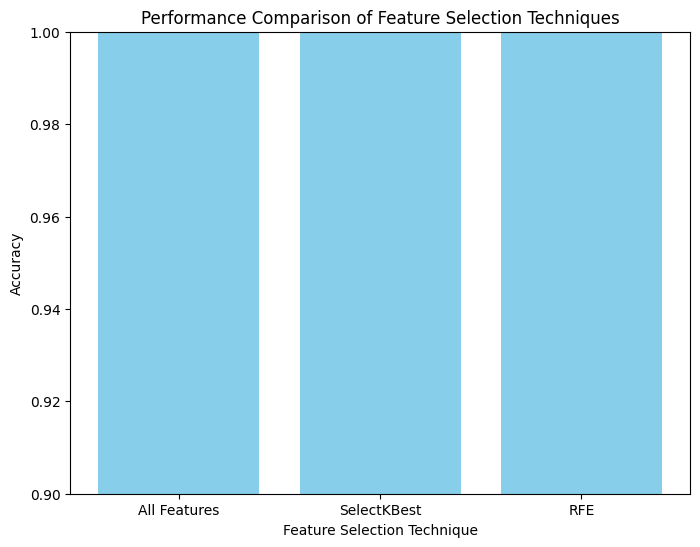

In [ ]:
import matplotlib.pyplot as plt

# List of feature selection techniques
feature_selection_methods = ['All Features', 'SelectKBest', 'RFE']

# List of accuracies obtained for each feature selection technique
accuracy_scores = [accuracy_all_features, accuracy_kbest, accuracy_rfe]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(feature_selection_methods, accuracy_scores, color='skyblue')
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Feature Selection Techniques')
plt.ylim(0.9, 1.0)  # Adjust ylim if needed
plt.show()


#Chalenge 2

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Assuming X and y are your feature matrix and target vector, respectively

# Step 1: Splitting the dataset into k folds
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Step 2, 3, 4, 5: Cross-validation loop
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over each fold in k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average scores
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Print average scores
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)


In [ ]:
# Step 4: Average performance
average_performance = np.mean(accuracy_scores)

print("Average Accuracy:", average_performance)

#Tria project on MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(int)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


# Breat Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
# Step 2: Exploratory Data Analysis
print("Feature Names:", cancer.feature_names)
print("Target Names:", cancer.target_names)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

In [ ]:
# Step 3: Feature Selection
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Technique 1: SelectKBest with chi2
k_best = SelectKBest(score_func=chi2, k=10)
X_train_kbest = k_best.fit_transform(X_train, y_train)
selected_features_kbest = [cancer.feature_names[i] for i in k_best.get_support(indices=True)]

# Feature Selection Technique 2: Recursive Feature Elimination (RFE) with Random Forest
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = [cancer.feature_names[i] for i in rfe.get_support(indices=True)]


In [ ]:
# Step 4: Train a classifier using the selected features
# Train classifiers using selected features
rf_classifier_selected_features_kbest = RandomForestClassifier()
rf_classifier_selected_features_rfe = RandomForestClassifier()

# Train with selected features using SelectKBest
rf_classifier_selected_features_kbest.fit(X_train_kbest, y_train)

# Train with selected features using RFE
rf_classifier_selected_features_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier()

In [ ]:
# Step 5: Evaluate the performance of the model
# Transform test set using selected features
X_test_kbest = k_best.transform(X_test)
X_test_rfe = rfe.transform(X_test)

# Predictions using models with selected features
y_pred_kbest = rf_classifier_selected_features_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = rf_classifier_selected_features_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

In [ ]:
# Step 6: Compare the performance
print("Selected features using SelectKBest:", selected_features_kbest)
print("Accuracy with selected features using SelectKBest:", accuracy_kbest)
print("Selected features using RFE:", selected_features_rfe)
print("Accuracy with selected features using RFE:", accuracy_rfe)

Selected features using SelectKBest: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']
Accuracy with selected features using SelectKBest: 0.9473684210526315
Selected features using RFE: ['mean radius', 'mean texture', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points', 'worst symmetry']
Accuracy with selected features using RFE: 0.956140350877193


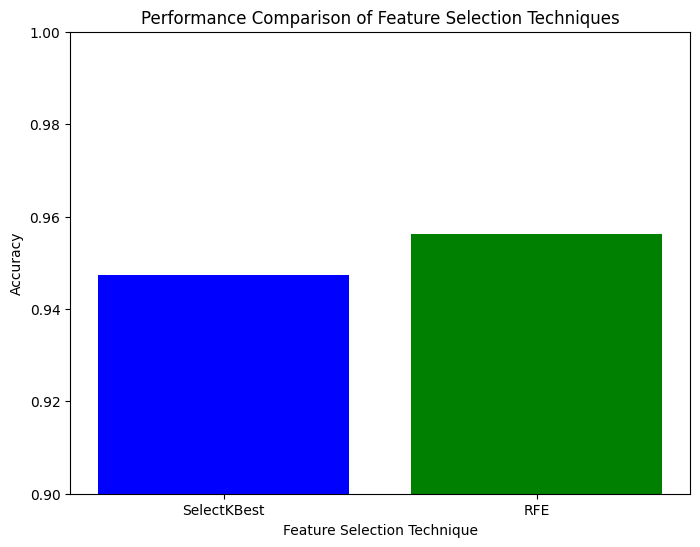

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each technique
accuracy_scores = [accuracy_kbest, accuracy_rfe]

# Techniques used
techniques = ['SelectKBest', 'RFE']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(techniques, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Feature Selection Techniques')
plt.ylim(0.9, 1)  # Set y-axis limit for better visualization
plt.show()
